# 1. Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import datetime

In [10]:
def explain(attribute):
    features= {'InvoiceNo': "Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.",
    'StockCode': 'Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.',
    'Description': 'Product (item) name. Nominal.',
    'Quantity': 'The quantities of each product (item) per transaction. Numeric.','InvoiceDate': 'Invice Date and time. Numeric, the day and time when each transaction was generated.',
    'UnitPrice': 'Unit price. Numeric, Product price per unit in sterling.',
    'CustomerID': 'Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.',
    'Country': 'Country name. Nominal, the name of the country where each customer resides.'}
    return features[attribute]

In [11]:
df_retail = pd.read_excel("OnlineRetail.xlsx")

In [12]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 2. Data Cleaning

Split into 3 Step: 
1. Null Value Handling
2. Duplicated Row Handling
3. Deep Dive Cleaning

## 2.1 Null Value

In [6]:
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df_retail.dropna(inplace=True)
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## 2.2 Duplicated Row 

In [8]:
df_retail.duplicated().sum()

5225

In [9]:
df_retail = df_retail.drop_duplicates()

In [10]:
df_retail.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


## 2.3 Deep Dive Cleaning

In [11]:
def summary(df_retail, pred=None):
    obs = df_retail.shape[0]
    Types = df_retail.dtypes
    Counts = df_retail.apply(lambda x: x.count())
    Min = df_retail.min()
    Max = df_retail.max()
    Uniques = df_retail.apply(lambda x: x.unique().shape[0])
    Nulls = df_retail.apply(lambda x: x.isnull().sum())
    print('Data shape:', df_retail.shape)
    
    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(df_retail).sort_values(by='Nulls', ascending=False))


Data shape: (401604, 8)
___________________________
Data Types:
object     5
float64    2
int64      1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Country,object,401604,37,0,Australia,Unspecified
CustomerID,float64,401604,4372,0,12346.0,18287.0
Description,object,401604,3896,0,4 PURPLE FLOCK DINNER CANDLES,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceDate,object,401604,20460,0,01-02-2011 08:23,31-10-2011 17:13
InvoiceNo,object,401604,22190,0,536365,C581569
Quantity,int64,401604,436,0,-80995,80995
StockCode,object,401604,3684,0,10002,POST
UnitPrice,float64,401604,620,0,0.0,38970.0


Melalui Deep Dive Analysis Diatas, Ditemukan hal yang mencurigakan yaitu data terkecil kuantitas bernilai negatif. Untuk memastikan definisi dari kuantitas, kita akan balik memeriksa definisi dari kolom/variabel kuantitas (Quantitiy)

In [12]:
explain('Quantity')

'The quantities of each product (item) per transaction. Numeric.'

Berdasarkan definisi ini, kita mengetahui bahwa kuantitas adalah jumlah item per setiap transaksi. Untuk memeriksa lebih lanjut terkait permasalahan pada kuantitas yang bernilai kurang dari nol. Dilakukan penelusuran lebih lanjut dengan melihat data dengan kuantitas lebih kecil dan lebih besar dari nol

In [13]:
df_retail[df_retail['Quantity'] <0].shape[0]

8872

In [14]:
df_retail[df_retail['Quantity'] <0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom


In [15]:
df_retail[df_retail['Quantity'] >0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Jika dilihat dari dua data yang tunjukkan dengan saring jumlah kuantitas, ditemukan bahwa terdapat perbedaan pada Invoice number ketika kuantitas lebih kecil dari nol dan lebih besar dari nol. Sehingga dilakukan penyelidikan lebih lanjut dengan melihat definisi dari Invoice No.

In [16]:
explain('InvoiceNo')

"Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation."

Dilihat disini dapat disimpulkan bahwa nilai kuantitas negatif mengindikasikan bahwa pesanan dibatalkan. Selanjutnya ditelusuri jumlah pesanan yang dibatalkan

In [17]:
df_retail['cancellation']=df_retail.InvoiceNo.str.extract('([C])').fillna(0).replace({'C':1})
df_retail['cancellation'].value_counts()

0    392732
1      8872
Name: cancellation, dtype: int64

In [18]:
df_retail = df_retail[df_retail.Quantity > 0] 

+ Dikarenakan disini ditemukan bahwa pesanan yang dibatalkan hanya sebagaian kecil dari data (Tidak mempengaruhi data secara keseluruhan apabila dibuang), maka diputuskan untuk membuang data.
+ Alasan lain kenapa pesanan yang dibatalkan dibuang datanya adalah pada tujuan bisnis (business goal) disebutkan kita ingin menganalisa kelompok (cluster) konsumen yang membeli produk perusahaan.
+ Tujuan bisnis yang ditentukan memberikan fokus kepada analis untuk menganalisis konsumen yang transaksinya berhasil. Sehingga data konsumen yang membatalkan pesanan tidak relevan dalam tujuan bisnis kali ini dan dapat dibuang datanya

Selanjutnya dilakukan pemeriksaan terhadap data setelah dilakukan proses pembuangan data dengan kuantitas bernilai negatif (pesanan dibatalkan)

In [19]:
df_retail.describe()

,Quantity,UnitPrice,CustomerID,cancellation
count,392732.000000,392732.000000,392732.000000,392732.0
mean,13.153718,3.125596,15287.734822,0.0
std,181.588420,22.240725,1713.567773,0.0
min,1.000000,0.000000,12346.000000,0.0
25%,2.000000,1.250000,13955.000000,0.0
50%,6.000000,1.950000,15150.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,8142.750000,18287.000000,0.0


Disini ditemukan bahwa kolom cancellation yang sebelumnya dibuat sekarang memiliki value 0 semua. Hal tersebut dikarenakan data pesanan konsumen yang dibatalkan sudah dibuang. Hal ini diperkuat dari data kuantitas yang tidak memiliki nilai negatif. Sehinga analis memutuskan untuk membuang kolom cancellation karena sudah tidak digunakan

In [20]:
df_retail=df_retail.drop('cancellation',axis=1)

In [21]:
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


# 3. Data Preperation

Pada tahap ini analis memproses data. Tujuan dari data perlu disiapkan adalah pada business goal disebutkan kita ingin mengelompokkan konsumen menggunakan data RFM agar dapat menargetkan konsumen dengan lebih efisien. Agar analis dapat mengelompokkan konsumen menggunakan data RFM, maka data yang sudah ada harus diubah dalan bentuk RFM.

## Monetary

In [22]:
df_retail['Monetary'] = df_retail['Quantity'] * df_retail['UnitPrice']
df_amount = df_retail.groupby(['CustomerID'],as_index=False)["Monetary"].sum()
df_amount

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


## Recency (Purchase)

In [23]:
# Second attribute : Purchase recency

# UDF to convert string to datetime
def convertDate(x):
    conv_date = datetime.datetime.strptime(x, '%d-%m-%Y %H:%M')
    return conv_date
# UDF to split date and pick out recent purchase days 
def splitDate(y):
    y = str(y)
    num_days = y.split()[0]
    num_days = int(num_days)
    return num_days
df_retail['InvoiceDate'] = df_retail.loc[:,'InvoiceDate'].apply(convertDate)
max_date = df_retail['InvoiceDate'].max()
df_retail['Recent_purchase_days'] = max_date - df_retail['InvoiceDate']
df_retail['Recent_purchase_days'] = df_retail['Recent_purchase_days'].apply(splitDate)
df_rec_purch = df_retail.groupby(['CustomerID'],as_index=False)["Recent_purchase_days"].min()
df_rec_purch.head()

,CustomerID,Recent_purchase_days
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [24]:
df_rec_purch

,CustomerID,Recent_purchase_days
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4334,18280.0,277
4335,18281.0,180
4336,18282.0,7
4337,18283.0,3


## Frequency

In [25]:
# Attribute : Frequency of purchase
df_purchase_freq = df_retail.groupby(['CustomerID'],as_index=False)["InvoiceNo"].count()
df_purchase_freq.rename(columns={'CustomerID':'CustomerID','InvoiceNo':'Frequency'},inplace=True)
df_purchase_freq

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,721


## RFM (Recency, Frequency, Monetary) Table

In [26]:
df_amt_purch = df_amount.merge(df_rec_purch,how='left',on=['CustomerID'])
df_model_inp = df_amt_purch.merge(df_purchase_freq,how='left',on=['CustomerID'])
df_model_inp.head()

,CustomerID,Monetary,Recent_purchase_days,Frequency
0,12346.0,77183.60,325,1
1,12347.0,4310.00,1,182
2,12348.0,1797.24,74,31
3,12349.0,1757.55,18,73
4,12350.0,334.40,309,17


In [27]:
df =df_model_inp
df

,CustomerID,Monetary,Recent_purchase_days,Frequency
0,12346.0,77183.60,325,1
1,12347.0,4310.00,1,182
2,12348.0,1797.24,74,31
3,12349.0,1757.55,18,73
4,12350.0,334.40,309,17
...,...,...,...,...
4334,18280.0,180.60,277,10
4335,18281.0,80.82,180,7
4336,18282.0,178.05,7,12
4337,18283.0,2045.53,3,721


Dikarenakan pada tabel RFM yang sudah dibuat ditemukan bahwa skala nilai antara data Recency, Frequency, dan Monetary tidak sama (disebabkan oleh jenis data yang direkam berbeda), Diputuskan untuk melakukan encoding terhadap data yang dimiliki dengan membagi data menjadi 4 bagian rata sesuai dengan konsep RFM Quantiles

In [28]:
quantiles = df.quantile(q=[0.25,0.50,0.75])
quantiles


,CustomerID,Monetary,Recent_purchase_days,Frequency
0.25,13812.5,306.455,17.0,17.0
0.50,15299.0,668.560,50.0,41.0
0.75,16778.5,1660.315,141.0,98.0


In [29]:
def Recent(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [30]:
def recurrence(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
def amount(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [31]:
df['R_Score'] = df['Recent_purchase_days'].apply(Recent, args=('Recent_purchase_days',quantiles))
df['F_Score'] = df['Frequency'].apply(recurrence, args=('Frequency',quantiles))
df['M_Score'] = df['Monetary'].apply(amount, args=('Monetary',quantiles))

In [32]:
df

,CustomerID,Monetary,Recent_purchase_days,Frequency,R_Score,F_Score,M_Score
0,12346.0,77183.60,325,1,1,1,4
1,12347.0,4310.00,1,182,4,4,4
2,12348.0,1797.24,74,31,2,2,4
3,12349.0,1757.55,18,73,3,3,4
4,12350.0,334.40,309,17,1,1,2
...,...,...,...,...,...,...,...
4334,18280.0,180.60,277,10,1,1,1
4335,18281.0,80.82,180,7,1,1,1
4336,18282.0,178.05,7,12,4,1,1
4337,18283.0,2045.53,3,721,4,4,4


In [33]:
df['Total'] = df.R_Score.apply(str) + df.F_Score.apply(str) + df.M_Score.apply(str)
df

,CustomerID,Monetary,Recent_purchase_days,Frequency,R_Score,F_Score,M_Score,Total
0,12346.0,77183.60,325,1,1,1,4,114
1,12347.0,4310.00,1,182,4,4,4,444
2,12348.0,1797.24,74,31,2,2,4,224
3,12349.0,1757.55,18,73,3,3,4,334
4,12350.0,334.40,309,17,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280.0,180.60,277,10,1,1,1,111
4335,18281.0,80.82,180,7,1,1,1,111
4336,18282.0,178.05,7,12,4,1,1,411
4337,18283.0,2045.53,3,721,4,4,4,444


In [34]:
label = [0] * len(df)

for i in range(0,len(df)):

    if df['Total'][i] == '111':
        label[i] = "Best Customers"
        
    elif df['Total'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif df['Total'][i] == '344':
        label[i] = "Lost Customers"
    
    elif df['Total'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif df['F_Score'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif df['M_Score'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [37]:
df['Label'] = label
df

,CustomerID,Monetary,Recent_purchase_days,Frequency,R_Score,F_Score,M_Score,Total,Label
0,12346.0,77183.60,325,1,1,1,4,114,Loyal Customers
1,12347.0,4310.00,1,182,4,4,4,444,Lost Cheap Customers
2,12348.0,1797.24,74,31,2,2,4,224,Others
3,12349.0,1757.55,18,73,3,3,4,334,Others
4,12350.0,334.40,309,17,1,1,2,112,Loyal Customers
...,...,...,...,...,...,...,...,...,...
4334,18280.0,180.60,277,10,1,1,1,111,Best Customers
4335,18281.0,80.82,180,7,1,1,1,111,Best Customers
4336,18282.0,178.05,7,12,4,1,1,411,Loyal Customers
4337,18283.0,2045.53,3,721,4,4,4,444,Lost Cheap Customers


In [38]:
df['Label'].value_counts()

Others                  2214
Loyal Customers          731
Lost Cheap Customers     450
Best Customers           381
Big Spenders             333
Lost Customers           217
Almost Lost               13
Name: Label, dtype: int64

<AxesSubplot:>

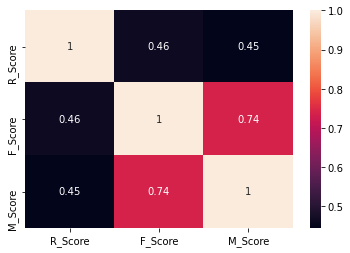

In [39]:
sns.heatmap(df.iloc[:, 4:7].corr(), annot=True)

# K-Means Clustering

## Finding The Optimal Cluster for Clustering

In [43]:
from sklearn.cluster import KMeans

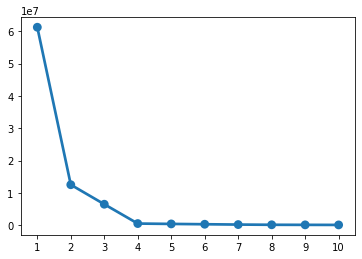

In [52]:
SSE = []
for k in range(0,10):
    kmeans = KMeans(n_clusters=k+1, random_state=1231).fit(df.iloc[:, 4:-1] )
    SSE.append(kmeans.inertia_)
sns.pointplot(x=list(range(1,11)), y=SSE)
plt.show()

Berdasarkan hasil analisis jumlah cluster optimal, ditemukan bahwa pengelompokkan data ke dalam 4 kelompok merupakan pengelompokan terbaik (menggunakan elbow method)

## Clustering using K-Means Method

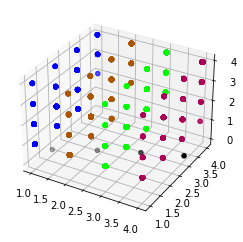

In [55]:
model = KMeans(n_clusters=4, random_state=1231).fit(df.iloc[:, 4:-1])
centers = model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 4],df.iloc[:, 5],df.iloc[:, 6],cmap="brg", c=model.predict(df.iloc[:, 4:-1]))
ax.scatter(centers[:, 0], centers[:, 1], c='black');

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


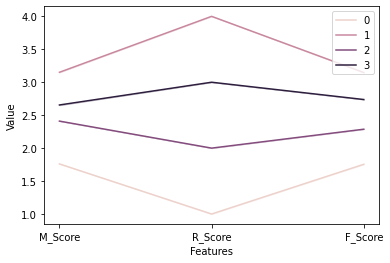

In [59]:
df['Cluster'] = model.labels_


melted_rfm_normalized = pd.melt(df.reset_index(), 
                                id_vars=['CustomerID', 'Cluster'],
                               value_vars=['M_Score','R_Score','F_Score'],
                               var_name='Features',
                               value_name='Value')
sns.lineplot('Features','Value', hue='Cluster',data=melted_rfm_normalized, ci=False)
plt.legend()

In [60]:
df.groupby(['Cluster','Label']).agg(
    count = ('Cluster','count')
)

count
Cluster Label                      
0       Almost Lost              13
        Best Customers          381
        Big Spenders            134
        Loyal Customers         143
        Others                  413
1       Big Spenders             44
        Lost Cheap Customers    450
        Loyal Customers         111
        Others                  521
2       Big Spenders             78
        Loyal Customers         297
        Others                  691
3       Big Spenders             77
        Lost Customers          217
        Loyal Customers         180
        Others                  589

In [41]:
df.groupby('Cluster').agg({
    'Recent_purchase_days':['mean','min','max'],
    'Frequency':['mean','min','max'],
    'Monetary':['mean','min','max', 'count']
})

Recent_purchase_days             Frequency               Monetary  \
                        mean  min  max        mean min   max         mean   
Cluster                                                                     
0                  31.229539   18   50   91.907808   1  1204  1753.616981   
1                  83.313321   51  141   52.260788   1   407  1032.703023   
2                 245.980627  142  373   29.507380   1   543   652.415232   
3                   7.500888    0   17  188.747780   1  7847  4652.960497   

                                
          min        max count  
Cluster                         
0        6.90  124914.53  1063  
1        6.20   21279.29  1066  
2        3.75   77183.60  1084  
3        0.00  280206.02  1126

# Result

Terdapat 4 Cluster yang terbentuk:
   + Cluster 1 beranggotakan 1063 konsumen dengan mayoritas konsumen termasuk ke dalam label "Best Customer","Loyal Customer", dan "Big Spender". Cluster ini diisi oleh 24,4987% dari total konsumen yang berbelanja produk di perusahaan. Cluster ini memiliki ciri2 nilai skor Frequency mendekati 1, Monetary mendekati 1, dan Recency mendekati 1. Skor tersebut memiliki arti bahwa Cluster ini terkumpul konsumen yang sering membeli, baru melakukan transaksi, dan yang mengeluarkan uang terbesar
   + Cluster 2 beranggotakan 1066 konsumen dengan mayoritas konsumen termasuk ke dalam label "Lost Cheap Customer". Cluster ini diisi oleh 24,567% dari total konsumen yang berbelanja produk di perusahaan. Cluster ini memiliki ciri2 nilai skor Frequency mendekati 4, Monetary mendekati 4, dan Recency mendekati 4. Skor tersebut memiliki arti bahwa Cluster ini terkumpul konsumen yang jarang membeli, pembelian terakhir sudah terlampau lama, dan mengeluarkan uang terkecil
   + Cluster 3 beranggotakan 1084 konsumen dengan mayoritas konsumen termasuk ke dalam label "Loyal Customer" dan "Big Spender".Cluster ini diisi oleh 24,983% dari total konsumen yang berbelanja produk di perusahaan. Cluster ini memiliki ciri2 nilai skor Frequency mendekati 2 dan Monetary mendekati 2. Skor tersebut memiliki arti bahwa Cluster ini terkumpul konsumen yang sewaktu-waktu masih datang untuk membeli produk dan rela mengeluarkan nominal uang tertentu untuk berbelanja.
   + Cluster 4 beranggotakan 1126 konsumen dengan mayoritas konsumen termasuk ke dalam label "Lost Customer" diikuti dengan "Big Spender" dan "Loyal Customer". Cluster in diisi oleh 25,951% dari total konsumen yang berbelanja produk di perusahaan. Cluster ini memiliki ciri2 nilai skor Frequency mendekati 4, Monetary mendekati 2, dan Recency mendekati 4. Skor tersebut memiliki arti bahwa Cluster ini terkumpul konsumen yang jarang membeli, pembelian terakhir sudah terlampau lama, namun rela mengeluarkan uang besar ketika melakukan pembelian. 